In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
from IPython.display import HTML

# -------------------------------
# Load dataset
# -------------------------------
df = pd.read_csv("vgsales.csv")
df = df.drop_duplicates()
df['Year'] = df['Year'].fillna(df['Year'].median()).astype(int)
years = sorted(df['Year'].unique())

In [2]:
# Preview the first 5 rows
df.head()

Rank                      Name Platform  Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [3]:
# Check column names, data types, and missing values
df.info()

# Preview first few rows
df.head()

# Check for missing values
df.isnull().sum()

# Summary statistics for numeric columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  int32  
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.3+ MB


Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16598.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.416134      0.264667      0.146652      0.077782   
std     4791.853933      5.781686      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  
max       10.570000     82.740000

In [4]:
# Drop duplicates
df = df.drop_duplicates()

# Fill missing 'Year' values (if any) with median
df['Year'] = df['Year'].fillna(df['Year'].median())

# Ensure 'Year' is integer
df['Year'] = df['Year'].astype(int)

# Check cleaned dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  int32  
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.3+ MB


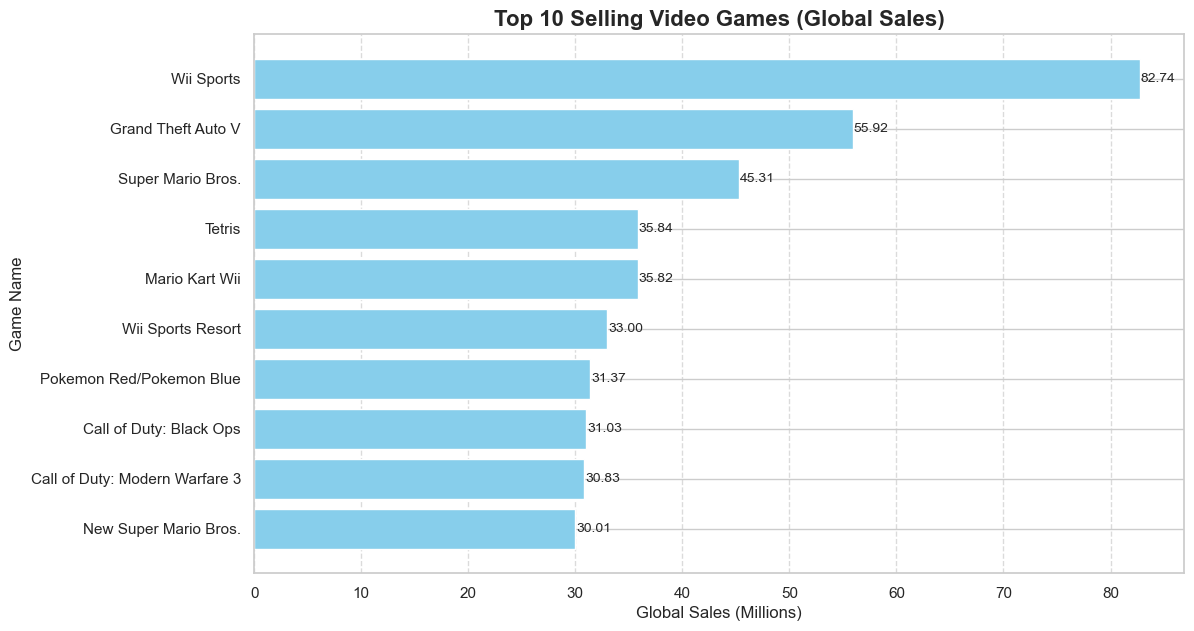

In [32]:
# Horizontal bar chart for readability
plt.figure(figsize=(12,7))
bars = plt.barh(top_games.index[::-1], top_games.values[::-1], color='skyblue')  # Reverse for descending
plt.title("Top 10 Selling Video Games (Global Sales)", fontsize=16)
plt.xlabel("Global Sales (Millions)")
plt.ylabel("Game Name")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add sales values on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2,
             f"{width:.2f}", va='center', fontsize=10)

plt.show()

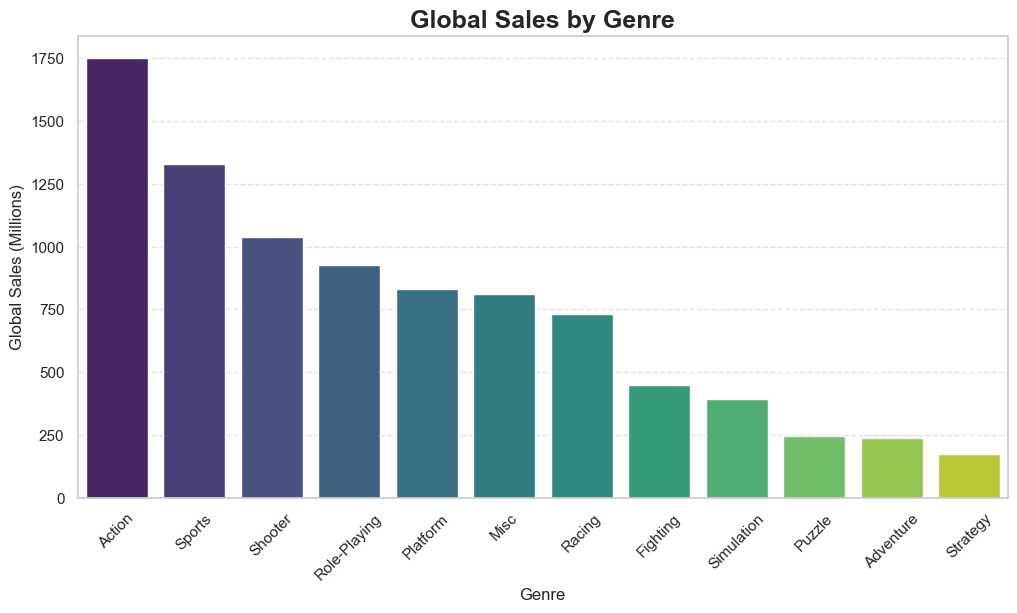

In [29]:
# Sales by Genre
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=genre_sales.index, y=genre_sales.values, palette="viridis")
plt.title("Global Sales by Genre", fontsize=18, fontweight='bold')
plt.xlabel("Genre")
plt.ylabel("Global Sales (Millions)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

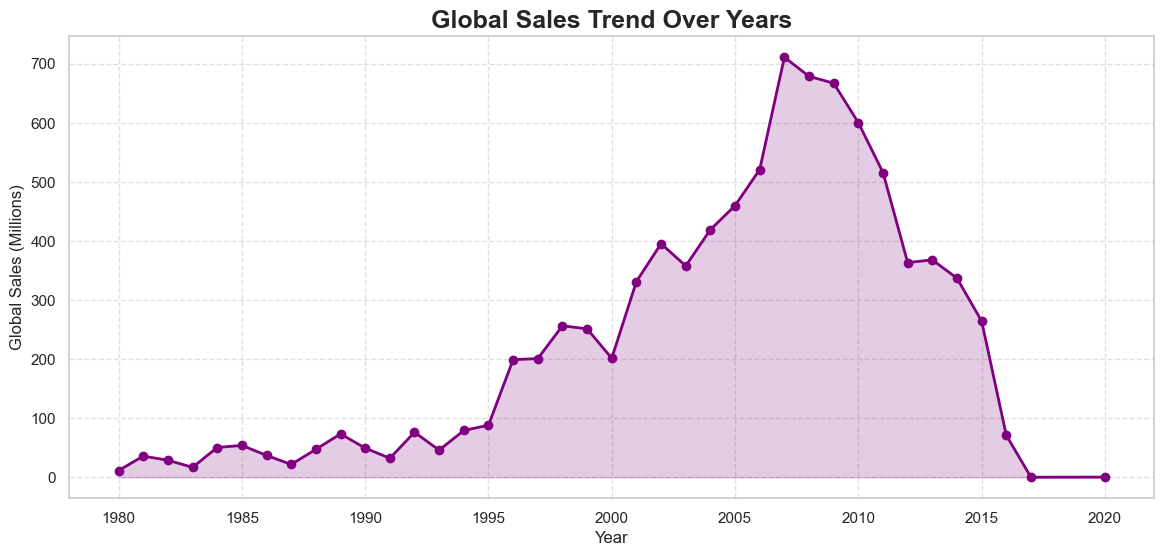

In [35]:
yearly_sales = df.groupby('Year')['Global_Sales'].sum()

plt.figure(figsize=(14,6))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', color='purple', linewidth=2)
plt.fill_between(yearly_sales.index, yearly_sales.values, alpha=0.2, color='purple')
plt.title("Global Sales Trend Over Years", fontsize=18, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Global Sales (Millions)")
plt.grid(linestyle='--', alpha=0.6)
plt.show()



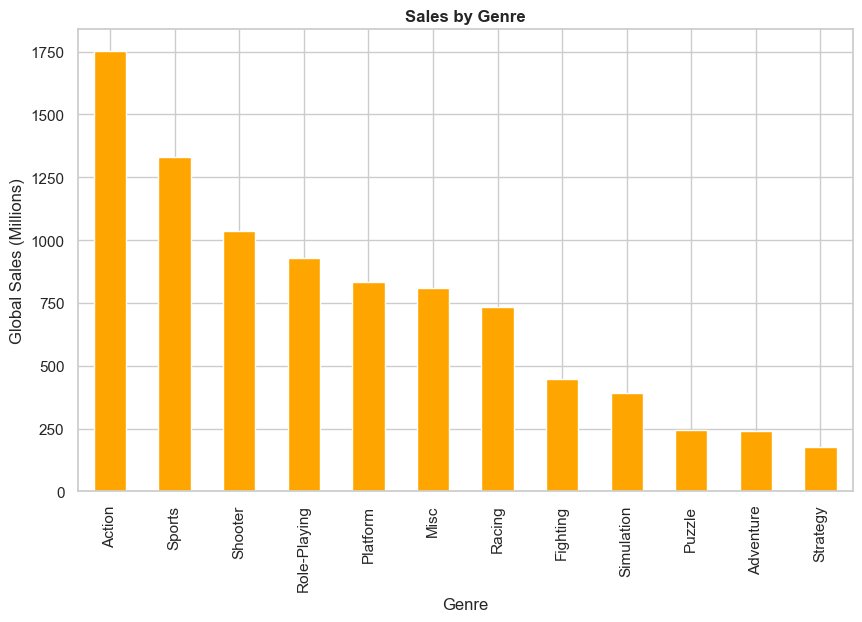

In [33]:
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
genre_sales.plot(kind='bar', figsize=(10,6), color='orange', title='Sales by Genre')
plt.ylabel("Global Sales (Millions)")
plt.show()


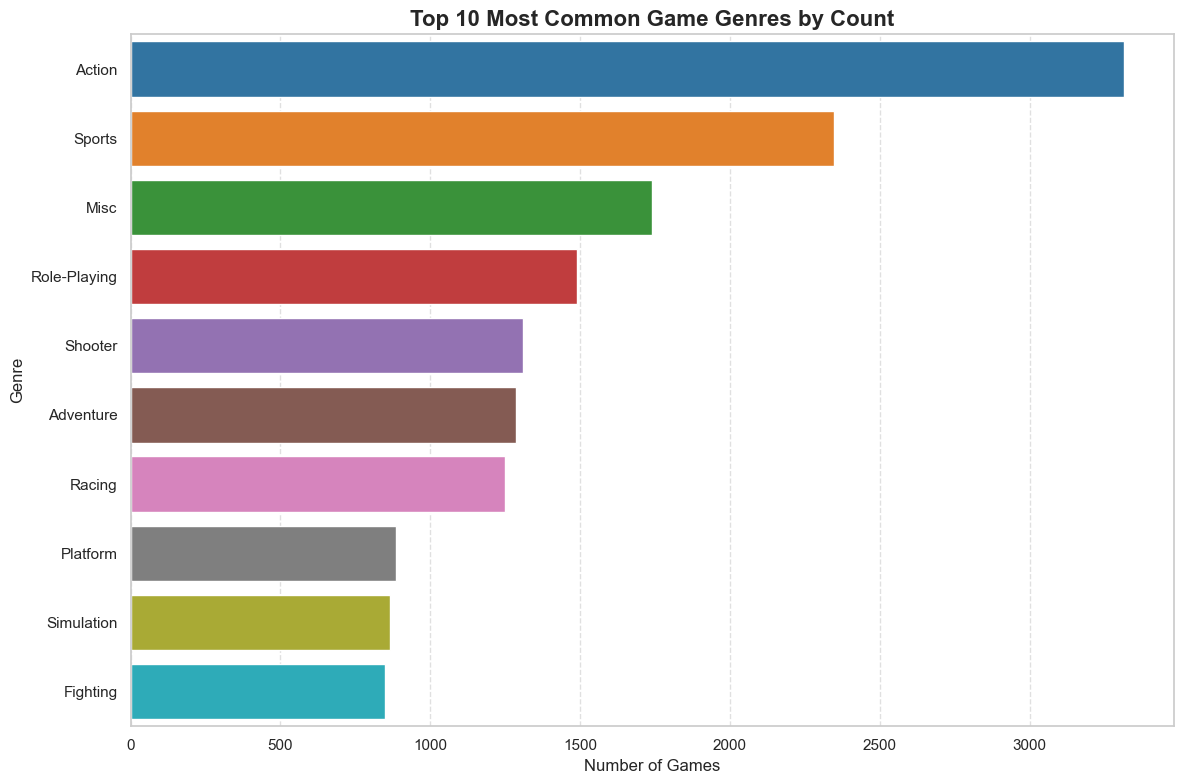

In [39]:
# Create a color palette with 10 distinct colors
colors = sns.color_palette("tab10", 10)
sns.countplot(y='Genre', data=df, order=top_genres_order, palette=colors)

plt.title('Top 10 Most Common Game Genres by Count', fontsize=16)
plt.xlabel('Number of Games', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig("plots/top10_genres_count_colorful.png", dpi=300)
plt.show()

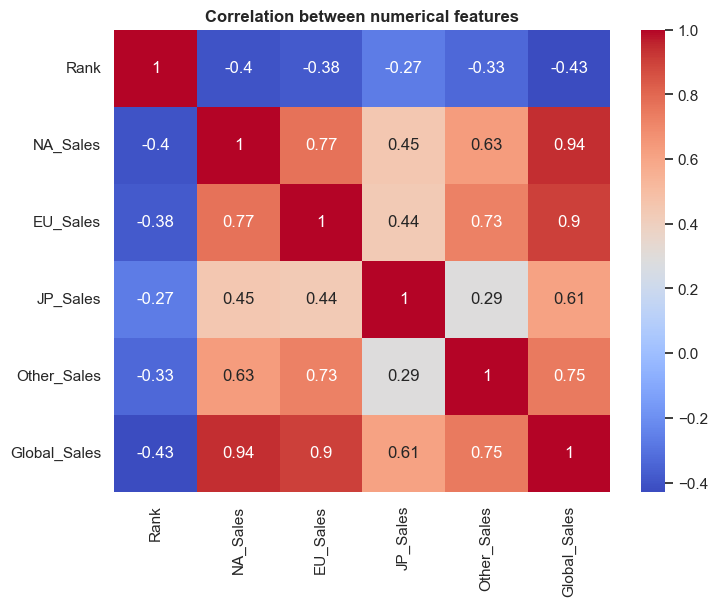

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between numerical features')
plt.show()


In [9]:

# Top 10 games by global sales
top_games = df.groupby('Name')['Global_Sales'].sum().sort_values(ascending=False).head(10)
top_games_names = top_games.index.tolist()

# -------------------------------
# Setup figure
# -------------------------------
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12,7))
ax.set_xlim(0, top_games.max()*1.1)
ax.set_xlabel("Global Sales (Millions)", fontsize=14)
ax.set_title("🏆 Animated Top 10 Video Games by Global Sales", fontsize=18, fontweight='bold', fontfamily='sans-serif')

bars = ax.barh(top_games_names, [0]*10, color=sns.color_palette("coolwarm", 10))

# -------------------------------
# Animation function
# -------------------------------
def animate(i):
    for bar, value in zip(bars, top_games.values):
        bar.set_width(value * i/100)  # gradually grow bar
    return bars

# -------------------------------
# Create animation
# -------------------------------
anim = FuncAnimation(fig, animate, frames=101, interval=50, blit=False)

# -------------------------------
# Display animation directly
# -------------------------------
html = anim.to_jshtml()
plt.close() # Prevents the static plot from displaying
HTML(html)

C:\Users\khann\AppData\Local\Temp\ipykernel_18444\622069549.py:32: UserWarning: Glyph 127942 (\N{TROPHY}) missing from current font.
  html = anim.to_jshtml()


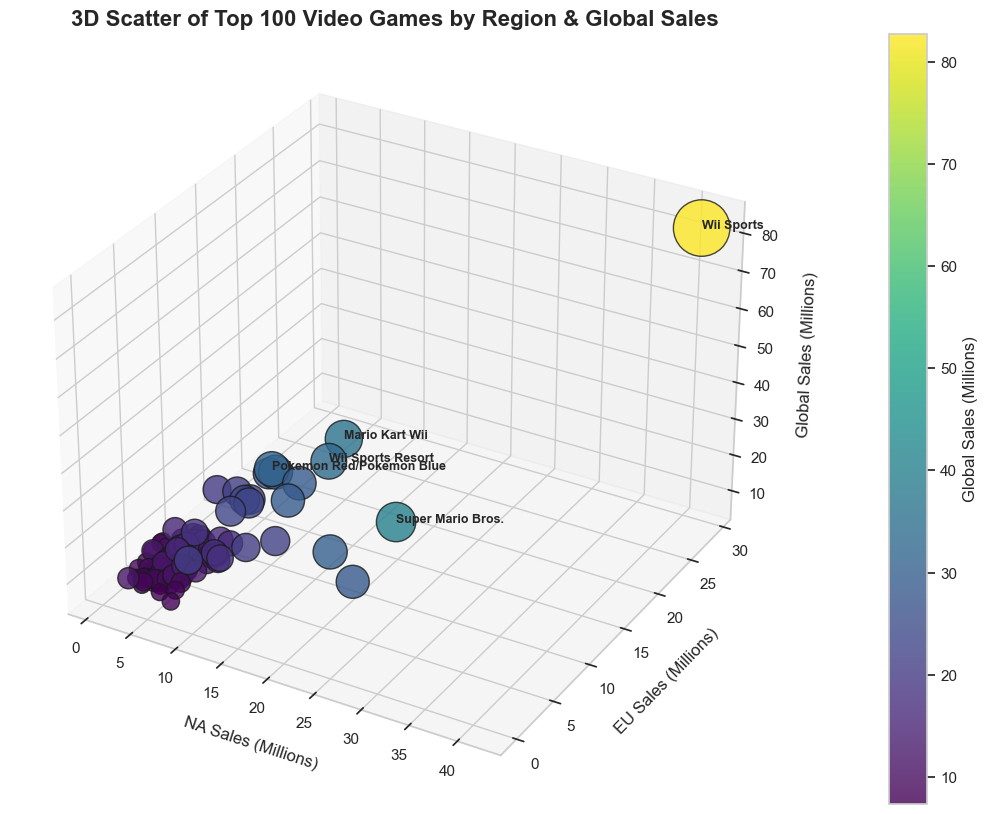

In [16]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

# Aesthetic
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,8)

# Select top 100 games for readability
top_games_3d = df.sort_values('Global_Sales', ascending=False).head(100)

# Create 3D figure
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111, projection='3d')

# Coordinates
x = top_games_3d['NA_Sales']
y = top_games_3d['EU_Sales']
z = top_games_3d['Global_Sales']
sizes = top_games_3d['Global_Sales']*20  # bubble size

# Scatter
sc = ax.scatter(x, y, z, c=z, cmap='viridis', s=sizes, alpha=0.8, edgecolor='k')

# Labels and title
ax.set_xlabel('NA Sales (Millions)', fontsize=12, labelpad=10)
ax.set_ylabel('EU Sales (Millions)', fontsize=12, labelpad=10)
ax.set_zlabel('Global Sales (Millions)', fontsize=12, labelpad=10)
ax.set_title('3D Scatter of Top 100 Video Games by Region & Global Sales', fontsize=16, fontweight='bold')

# Colorbar
cbar = plt.colorbar(sc, pad=0.1)
cbar.set_label('Global Sales (Millions)', fontsize=12)

# Annotate top 5 games
for i, row in top_games_3d.head(5).iterrows():
    ax.text(row['NA_Sales'], row['EU_Sales'], row['Global_Sales'], row['Name'], fontsize=9, weight='bold')

plt.show()


In [41]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Ensure 'plots' folder exists
if not os.path.exists("plots"):
    os.makedirs("plots")

# 1️⃣ Top 10 Selling Video Games (Horizontal Bar)
plt.figure(figsize=(12,7))
bars = plt.barh(top_games.index[::-1], top_games.values[::-1], color='skyblue')
plt.title("Top 10 Selling Video Games (Global Sales)", fontsize=16)
plt.xlabel("Global Sales (Millions)")
plt.ylabel("Game Name")
plt.grid(axis='x', linestyle='--', alpha=0.7)
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2, f"{width:.2f}", va='center', fontsize=10)
plt.tight_layout()
plt.savefig("plots/top10_games.png", dpi=300)
plt.close()

# 2️⃣ Global Sales by Genre
plt.figure(figsize=(12,6))
sns.barplot(x=genre_sales.index, y=genre_sales.values, palette="viridis")
plt.title("Global Sales by Genre", fontsize=18, fontweight='bold')
plt.xlabel("Genre")
plt.ylabel("Global Sales (Millions)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("plots/sales_by_genre.png", dpi=300)
plt.close()

# 3️⃣ Global Sales Trend Over Years
plt.figure(figsize=(14,6))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', color='purple', linewidth=2)
plt.fill_between(yearly_sales.index, yearly_sales.values, alpha=0.2, color='purple')
plt.title("Global Sales Trend Over Years", fontsize=18, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Global Sales (Millions)")
plt.grid(linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("plots/sales_trend_years.png", dpi=300)
plt.close()

# 4️⃣ Sales by Genre (orange bar)
genre_sales.plot(kind='bar', figsize=(10,6), color='orange', title='Sales by Genre')
plt.ylabel("Global Sales (Millions)")
plt.tight_layout()
plt.savefig("plots/sales_by_genre_orange.png", dpi=300)
plt.close()

# 5️⃣ Top 10 Most Common Game Genres by Count (Colorful)
top_genres_order = df['Genre'].value_counts().index[:10]
plt.figure(figsize=(10,6))
colors = sns.color_palette("tab10", 10)
sns.countplot(y='Genre', data=df, order=top_genres_order, palette=colors)
plt.title('Top 10 Most Common Game Genres by Count', fontsize=16)
plt.xlabel('Number of Games', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("plots/top10_genres_count_colorful.png", dpi=300)
plt.close()

# 6️⃣ Correlation Heatmap
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between numerical features')
plt.tight_layout()
plt.savefig("plots/correlation_heatmap.png", dpi=300)
plt.close()

# 7️⃣ Animated Top 10 Video Games (save static version)
plt.figure(figsize=(12,7))
bars = plt.barh(top_games_names[::-1], top_games.values[::-1], color=sns.color_palette("coolwarm", 10))
plt.title("Top 10 Best-Selling Video Games", fontsize=18, fontweight='bold')
plt.xlabel("Global Sales (Millions)")
plt.ylabel("Game Name")
plt.tight_layout()
plt.savefig("plots/top10_games_colorful.png", dpi=300)
plt.close()

# 8️⃣ 3D Scatter of Top 100 Games
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111, projection='3d')
x = top_games_3d['NA_Sales']
y = top_games_3d['EU_Sales']
z = top_games_3d['Global_Sales']
sizes = top_games_3d['Global_Sales']*20
sc = ax.scatter(x, y, z, c=z, cmap='viridis', s=sizes, alpha=0.8, edgecolor='k')
ax.set_xlabel('NA Sales (Millions)', fontsize=12, labelpad=10)
ax.set_ylabel('EU Sales (Millions)', fontsize=12, labelpad=10)
ax.set_zlabel('Global Sales (Millions)', fontsize=12, labelpad=10)
ax.set_title('3D Scatter of Top 100 Video Games by Region & Global Sales', fontsize=16, fontweight='bold')
cbar = plt.colorbar(sc, pad=0.1)
cbar.set_label('Global Sales (Millions)', fontsize=12)
for i, row in top_games_3d.head(5).iterrows():
    ax.text(row['NA_Sales'], row['EU_Sales'], row['Global_Sales'], row['Name'], fontsize=9, weight='bold')
plt.tight_layout()
plt.savefig("plots/top100_3d_scatter.png", dpi=300)
plt.close()
